# CCS Permits Data Analysis

This notebook provides a comprehensive analysis of the CCS (City Construction Services) permits dataset, exploring patterns in permit types, values, temporal trends, and geographic distributions.

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

In [2]:
# Load the dataset
df = pd.read_csv('source/CCS_Permits.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

Dataset shape: (358301, 26)

Columns: ['X', 'Y', 'Display', 'APN', 'Longitude', 'Latitude', 'Neighborhoods_Desc', 'Wards', 'applicantName', 'permitNumber', 'dwellingUnitsNew', 'dwellingUnitsEliminated', 'permitType', 'occupancyType', 'workType', 'status', 'milestone', 'value', 'totalFees', 'comments', 'issueDate', 'completeDate', 'fullName', 'applicantAddress1', 'applicantCity', 'OBJECTID']


## 2. Data Exploration and Cleaning

In [3]:
# Display first few rows
df.head()

,X,Y,Display,APN,Longitude,Latitude,Neighborhoods_Desc,Wards,applicantName,permitNumber,dwellingUnitsNew,dwellingUnitsEliminated,permitType,occupancyType,workType,status,milestone,value,totalFees,comments,issueDate,completeDate,fullName,applicantAddress1,applicantCity,OBJECTID
0,0.00000,0.00000,NaN,NaN,0.00000,0.00000,NaN,NaN,Cities 1 Plumbing and Heating Inc,BLDG755804,NaN,NaN,Plumbing,,ComNoFdBv,Closed,Closed,0.0,244.60,unit # 404 tub to shower/ kitchen remodel,2019/02/26 10:57:52+00,2022/06/02 08:48:58+00,NaN,787 Hubbard Ave,St. Paul,1
1,-93.22089,44.96531,1 27TH AVE SE,3002923340011,-93.22089,44.96531,Prospect Park - East River Road,2.0,MESPO HEATING AND COOLING INC,BLDG855074,NaN,NaN,Mechanical,SFD,ExistRes,Closed,Closed,0.0,217.60,"Full System Install with ductwork, furnace and...",2020/10/14 15:23:50+00,2020/10/21 12:12:03+00,CRAIG S BUECHLER,1904 GLENWOOD AVE N,MINNEAPOLIS,2
2,-93.25567,44.98478,1 2ND ST SE,2302924139000,-93.25567,44.98478,Marcy Holmes,3.0,Atlas Restoration & Construction LLC,BLDG1057732,0.0,0.0,Commercial,MFD,RoofWind,Closed,Closed,31150.0,697.88,remove existing roofing. Install new shingle...,2024/05/09 11:16:18+00,2024/08/02 12:54:00+00,NaN,10340 Viking Dr #105,Eden Prairie,3
3,-93.26943,44.98766,1 4TH AVE N #101,2202924119000,-93.26943,44.98766,North Loop,3.0,Farr Plumbing and Heating LLC,BLDG964331,NaN,NaN,Plumbing,MFD,ComMin,Closed,Closed,0.0,85.20,ADD GAS LINE FOR BBQ,2022/09/20 10:03:44+00,2023/12/04 08:14:17+00,NaN,3410 Kilmer Lane N,Plymouth,4
4,-93.26900,44.98796,1 4TH AVE N #101,2202924119000,-93.26900,44.98796,North Loop,3.0,Farr Plumbing and Heating LLC,BLDG964331,NaN,NaN,Plumbing,MFD,ComMin,Closed,Closed,0.0,85.20,ADD GAS LINE FOR BBQ,2022/09/20 10:03:44+00,2023/12/04 08:14:17+00,NaN,3410 Kilmer Lane N,Plymouth,5


In [4]:
# Check data types and missing values
print("Data Types and Missing Values:")
print("=" * 50)
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df)

Data Types and Missing Values:
                        Data Type  Non-Null Count  Null Count  Null %
X                         float64          358301           0    0.00
Y                         float64          358301           0    0.00
Display                    object          358288          13    0.00
APN                        object          358243          58    0.02
Longitude                 float64          358301           0    0.00
Latitude                  float64          358301           0    0.00
Neighborhoods_Desc         object          355977        2324    0.65
Wards                     float64          355973        2328    0.65
applicantName              object          358300           1    0.00
permitNumber               object          358301           0    0.00
dwellingUnitsNew          float64          137291      221010   61.68
dwellingUnitsEliminated   float64          137291      221010   61.68
permitType                 object          358301          

In [5]:
# Convert date columns to datetime
date_columns = ['issueDate', 'completeDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract year, month, and day from dates
df['issue_year'] = df['issueDate'].dt.year
df['issue_month'] = df['issueDate'].dt.month
df['issue_day_of_week'] = df['issueDate'].dt.day_name()

df['complete_year'] = df['completeDate'].dt.year
df['complete_month'] = df['completeDate'].dt.month

# Calculate permit duration
df['permit_duration_days'] = (df['completeDate'] - df['issueDate']).dt.days

In [6]:
# Clean numeric columns
numeric_columns = ['value', 'totalFees', 'dwellingUnitsNew', 'dwellingUnitsEliminated']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display summary statistics
print("\nSummary Statistics for Numeric Columns:")
df[numeric_columns].describe()


Summary Statistics for Numeric Columns:


,value,totalFees,dwellingUnitsNew,dwellingUnitsEliminated
count,3.583010e+05,3.545150e+05,137291.000000,137291.000000
mean,8.771201e+04,1.661534e+03,0.185657,0.012157
std,1.042093e+06,1.034093e+05,5.872535,2.704734
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,8.520000e+01,0.000000,0.000000
50%,0.000000e+00,1.334000e+02,0.000000,0.000000
75%,1.000000e+04,3.451300e+02,0.000000,0.000000
max,1.439050e+08,5.752160e+07,999.000000,999.000000


## 3. Permit Types Analysis

In [7]:
# Analyze permit types distribution
permit_types = df['permitType'].value_counts()
print(f"Number of unique permit types: {len(permit_types)}")
print("\nTop 10 permit types:")
print(permit_types.head(10))

Number of unique permit types: 6

Top 10 permit types:
permitType
Plumbing      143220
Res            96696
Mechanical     76115
Commercial     41146
Wrecking         912
Site             212
Name: count, dtype: int64


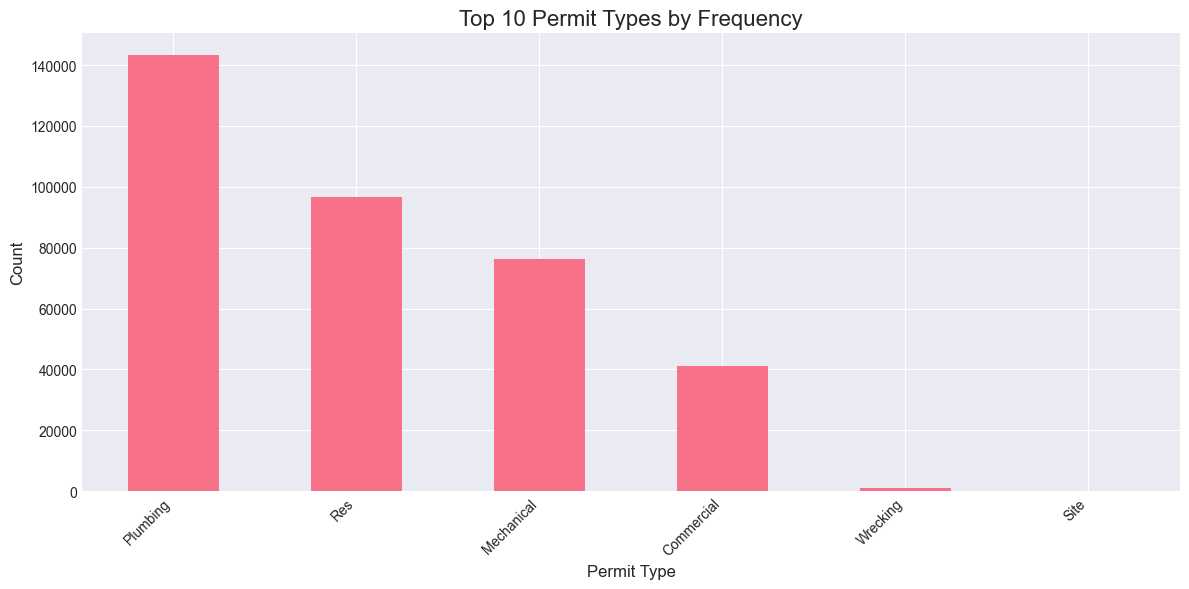

In [8]:
# Visualize permit types
plt.figure(figsize=(12, 6))
permit_types.head(10).plot(kind='bar')
plt.title('Top 10 Permit Types by Frequency', fontsize=16)
plt.xlabel('Permit Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Analyze work types
work_types = df['workType'].value_counts()
print(f"\nNumber of unique work types: {len(work_types)}")
print("\nTop 10 work types:")
print(work_types.head(10))


Number of unique work types: 28

Top 10 work types:
workType
Res          104766
Misc          63930
Remodel       55700
ExistRes      53133
ComNoFdBv     23240
Comm-MFD      11761
ComMin         9251
RoofWind       6979
Addition       6021
ComMFDRR       5475
Name: count, dtype: int64


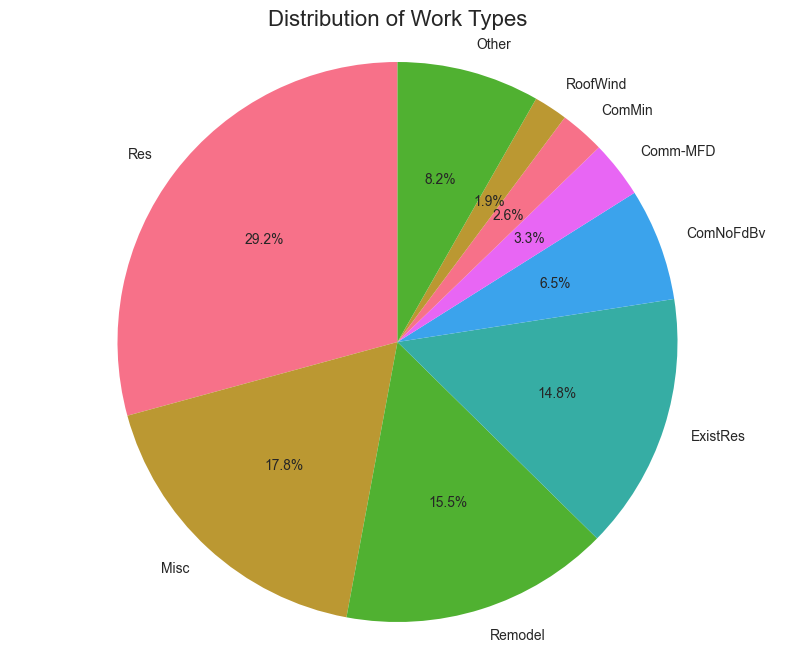

In [10]:
# Create a pie chart for work types
plt.figure(figsize=(10, 8))
top_work_types = work_types.head(8)
other_count = work_types[8:].sum()
if other_count > 0:
    top_work_types['Other'] = other_count

plt.pie(top_work_types.values, labels=top_work_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Work Types', fontsize=16)
plt.axis('equal')
plt.show()

## 4. Temporal Analysis

In [11]:
# Analyze permits by year
yearly_permits = df['issue_year'].value_counts().sort_index()
print("Permits issued by year:")
print(yearly_permits)

Permits issued by year:
issue_year
2016     2587
2017    42711
2018    40211
2019    42905
2020    40931
2021    40409
2022    39363
2023    47069
2024    47026
2025    15089
Name: count, dtype: int64


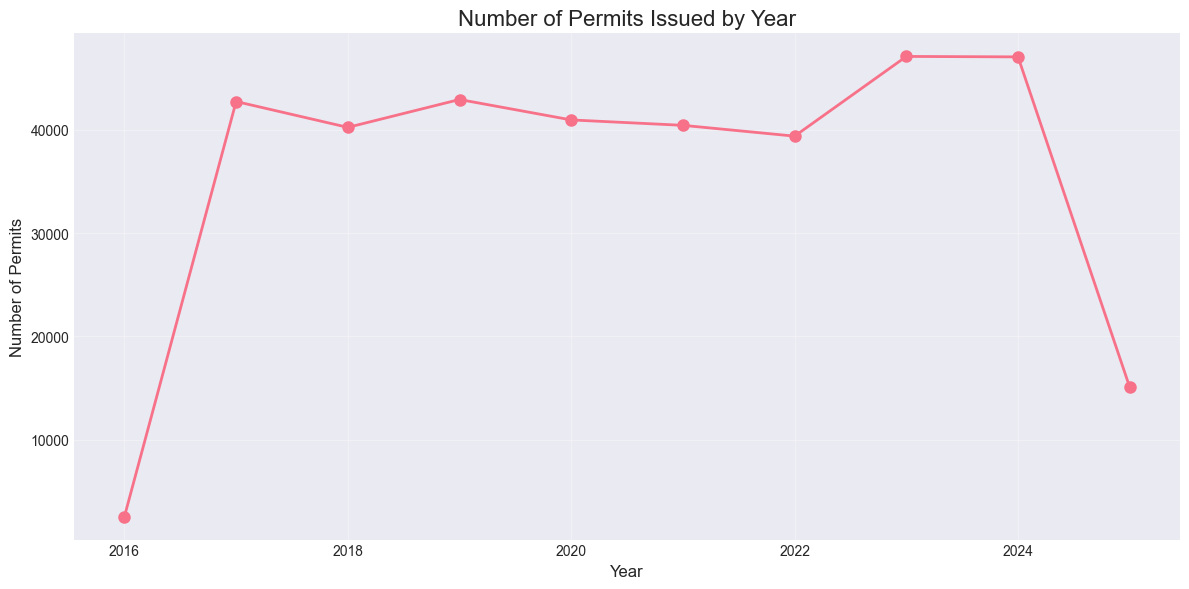

In [12]:
# Plot yearly trend
plt.figure(figsize=(12, 6))
yearly_permits.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Number of Permits Issued by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Permits', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

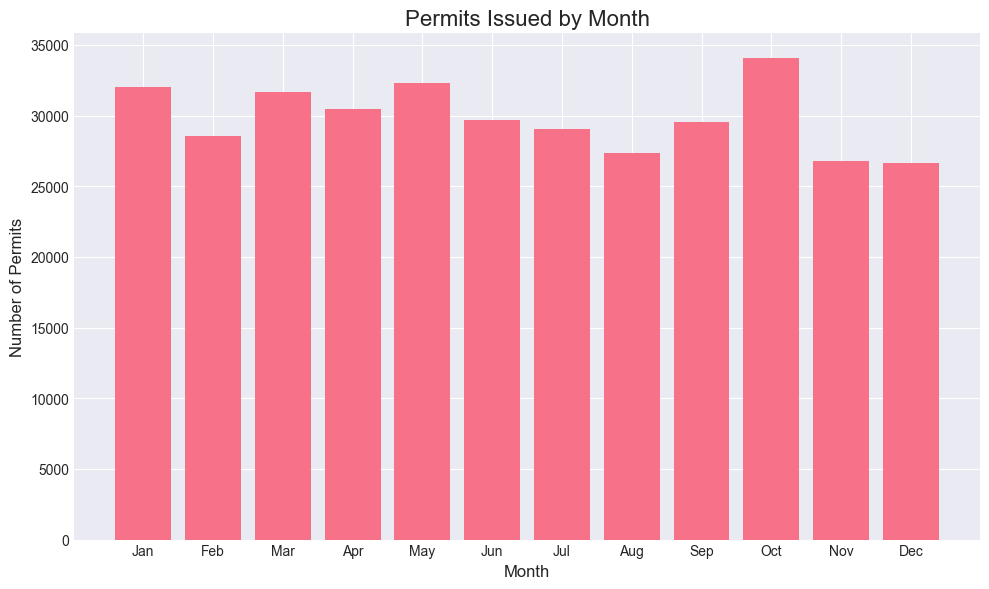

In [13]:
# Analyze permits by month
monthly_permits = df['issue_month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.bar(monthly_permits.index, monthly_permits.values)
plt.title('Permits Issued by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Permits', fontsize=12)
plt.xticks(range(1, 13), month_names)
plt.tight_layout()
plt.show()

Permit Duration Statistics (in days):
count    318645.000000
mean        317.634666
std         382.316693
min        -385.000000
25%          42.000000
50%         145.000000
75%         467.000000
max        2538.000000
Name: permit_duration_days, dtype: float64


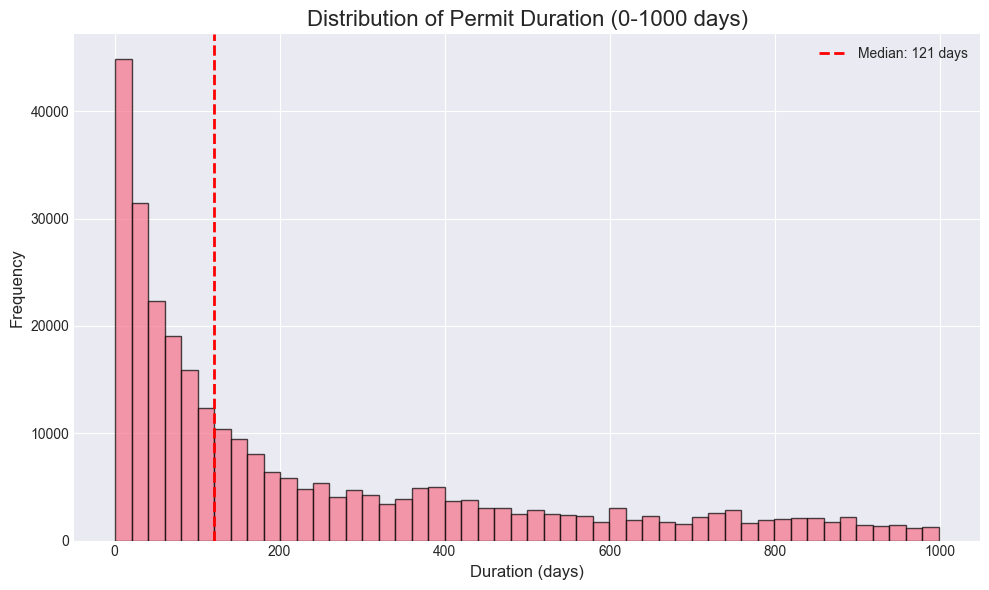

In [14]:
# Analyze permit duration
duration_stats = df['permit_duration_days'].describe()
print("Permit Duration Statistics (in days):")
print(duration_stats)

# Filter out extreme outliers for visualization
duration_filtered = df[(df['permit_duration_days'] > 0) & (df['permit_duration_days'] < 1000)]['permit_duration_days']

plt.figure(figsize=(10, 6))
plt.hist(duration_filtered, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Permit Duration (0-1000 days)', fontsize=16)
plt.xlabel('Duration (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(duration_filtered.median(), color='red', linestyle='dashed', linewidth=2, label=f'Median: {duration_filtered.median():.0f} days')
plt.legend()
plt.tight_layout()
plt.show()

## 5. Geographic Analysis

In [15]:
# Analyze permits by neighborhood
neighborhoods = df['Neighborhoods_Desc'].value_counts()
print(f"Number of unique neighborhoods: {len(neighborhoods)}")
print("\nTop 15 neighborhoods by permit count:")
print(neighborhoods.head(15))

Number of unique neighborhoods: 87

Top 15 neighborhoods by permit count:
Neighborhoods_Desc
Loring Park                    21960
Downtown West                  12450
Linden Hills                    9518
Howe                            9122
Hiawatha                        8824
Standish                        8750
Nicollet Island - East Bank     8714
Fulton                          8624
Lynnhurst                       8609
Minnehaha                       7390
King Field                      7330
Diamond Lake                    6897
Armatage                        6526
North Loop                      6482
Waite Park                      6368
Name: count, dtype: int64


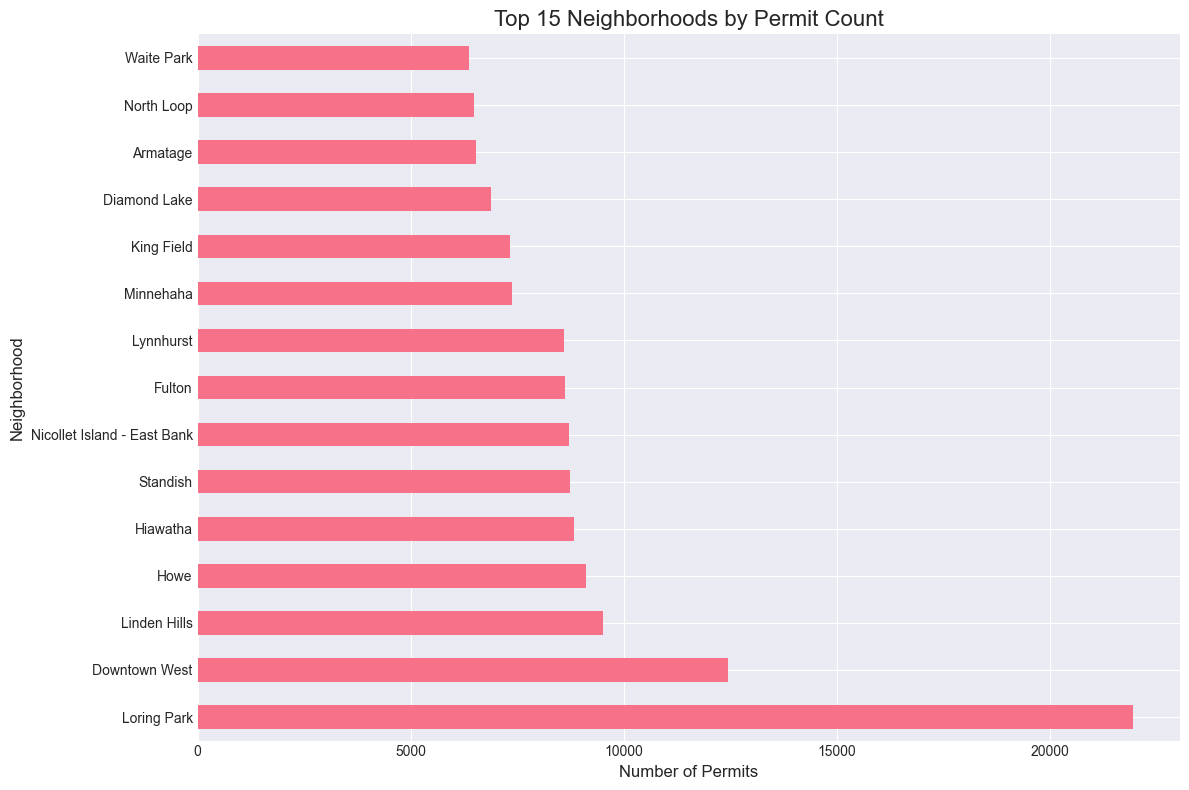

In [16]:
# Visualize top neighborhoods
plt.figure(figsize=(12, 8))
neighborhoods.head(15).plot(kind='barh')
plt.title('Top 15 Neighborhoods by Permit Count', fontsize=16)
plt.xlabel('Number of Permits', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.tight_layout()
plt.show()

Permits by Ward:
Wards
1.0     27633
2.0     10825
3.0     32599
4.0     25075
5.0     17242
6.0      7840
7.0     51372
8.0     24536
9.0     20223
10.0    13842
11.0    34183
12.0    47966
13.0    42637
Name: count, dtype: int64


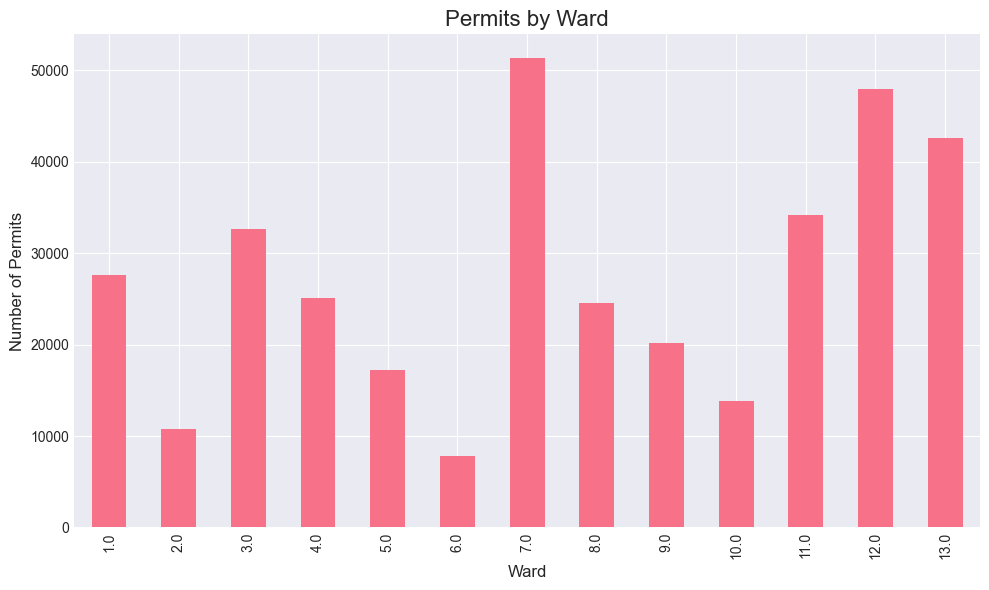

In [17]:
# Analyze permits by ward
wards = df['Wards'].value_counts().sort_index()
print("Permits by Ward:")
print(wards)

plt.figure(figsize=(10, 6))
wards.plot(kind='bar')
plt.title('Permits by Ward', fontsize=16)
plt.xlabel('Ward', fontsize=12)
plt.ylabel('Number of Permits', fontsize=12)
plt.tight_layout()
plt.show()

## 6. Financial Analysis

In [18]:
# Analyze permit values
value_stats = df[df['value'] > 0]['value'].describe()
print("Permit Value Statistics:")
print(value_stats)
print(f"\nTotal value of all permits: ${df['value'].sum():,.2f}")

Permit Value Statistics:
count    1.583370e+05
mean     1.984836e+05
std      1.560589e+06
min      1.500000e-03
25%      5.267000e+03
50%      1.200000e+04
75%      2.960000e+04
max      1.439050e+08
Name: value, dtype: float64

Total value of all permits: $31,427,300,478.98


In [19]:
# Analyze fees
fee_stats = df[df['totalFees'] > 0]['totalFees'].describe()
print("\nPermit Fee Statistics:")
print(fee_stats)
print(f"\nTotal fees collected: ${df['totalFees'].sum():,.2f}")


Permit Fee Statistics:
count    3.544960e+05
mean     1.661623e+03
std      1.034121e+05
min      2.500000e-01
25%      8.520000e+01
50%      1.334000e+02
75%      3.451300e+02
max      5.752160e+07
Name: totalFees, dtype: float64

Total fees collected: $589,038,646.56


In [20]:
# Value distribution by permit type
permit_value_by_type = df.groupby('permitType')['value'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
print("\nTop 10 Permit Types by Total Value:")
print(permit_value_by_type.head(10))


Top 10 Permit Types by Total Value:
                     sum          mean   count
permitType                                    
Commercial  2.443602e+10  5.938858e+05   41146
Mechanical  4.423394e+09  5.811461e+04   76115
Res         2.092120e+09  2.163606e+04   96696
Site        4.481755e+08  2.114035e+06     212
Wrecking    2.754047e+07  3.019789e+04     912
Plumbing    4.670500e+04  3.261067e-01  143220


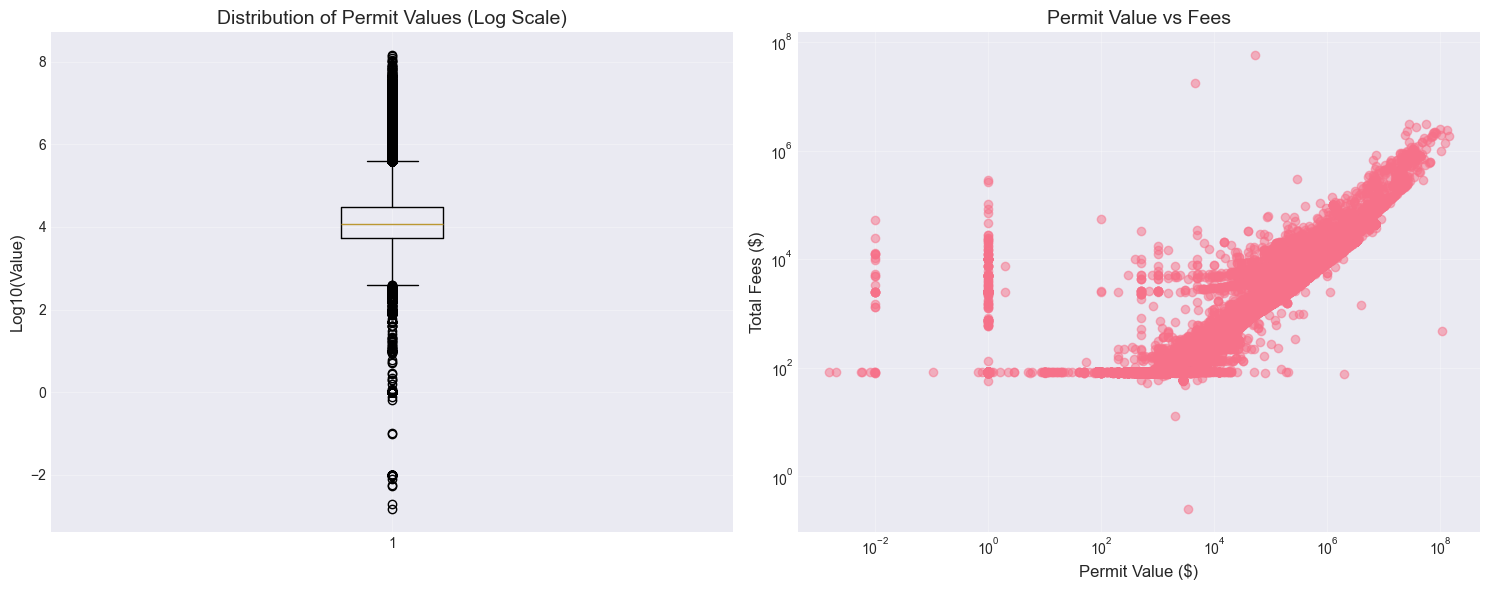

In [21]:
# Visualize value distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Box plot of values (log scale)
values_positive = df[df['value'] > 0]['value']
ax1.boxplot(np.log10(values_positive), vert=True)
ax1.set_ylabel('Log10(Value)', fontsize=12)
ax1.set_title('Distribution of Permit Values (Log Scale)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Scatter plot: Value vs Fees
valid_data = df[(df['value'] > 0) & (df['totalFees'] > 0)]
ax2.scatter(valid_data['value'], valid_data['totalFees'], alpha=0.5)
ax2.set_xlabel('Permit Value ($)', fontsize=12)
ax2.set_ylabel('Total Fees ($)', fontsize=12)
ax2.set_title('Permit Value vs Fees', fontsize=14)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Status Analysis

Permit Status Distribution:
status
Closed        317237
Issued         25041
Open            8795
Cancelled       7216
Stop Work          5
Withdrawn          4
Void               2
In Process         1
Name: count, dtype: int64


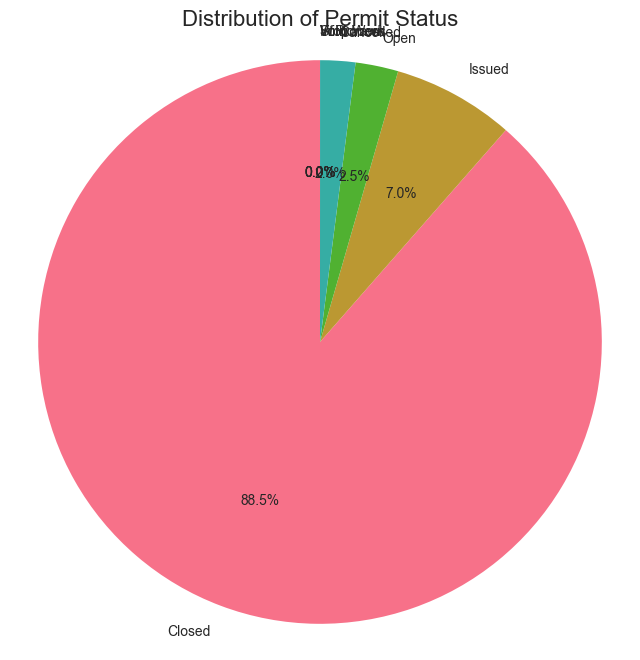

In [22]:
# Analyze permit status
status_counts = df['status'].value_counts()
print("Permit Status Distribution:")
print(status_counts)

plt.figure(figsize=(8, 8))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Permit Status', fontsize=16)
plt.axis('equal')
plt.show()

In [23]:
# Analyze milestone distribution
milestone_counts = df['milestone'].value_counts()
print("\nPermit Milestone Distribution:")
print(milestone_counts)


Permit Milestone Distribution:
milestone
Closed                           318526
Inspection                        21682
Final Inspection                  12125
Cancelled                          5931
Hole Inspection                      32
Inspections                           2
Fees                                  1
Applicant Resubmit                    1
Applicant Resubmit - No ePlan         1
Name: count, dtype: int64


## 8. Applicant Analysis

Top 20 Applicants by Permit Count:
applicantName
CenterPoint Energy Resource Corp                    32152
Warners Stellian Co Inc                             12073
CENTERPOINT ENERGY                                   9163
Standard Heating and Air Conditioning Inc            6313
Urban Pine Plumbing and Mechanical Inc               5284
MN Plumbing & Home Services INC                      4578
RENEWAL BY ANDERSEN CORP                             3737
UPTOWN PLUMBING HEATING AND COOLING                  2712
Horwitz LLC                                          2622
ZEMAN CONSTRUCTION CO                                2544
Metropolitan Mechanical Contractors Inc              2422
GITTLEMAN CONSTRUCTION & MAINTENANCE CORPORATION     2417
Hero Home Services LLC                               2294
CHAMPION PLUMBING LLC                                2290
Ray N Welter Heating Co                              2276
BONFES PLUMBING HEATING AND AIR SERVICE INC          2147
KAUFMAN SHEET METAL ROO

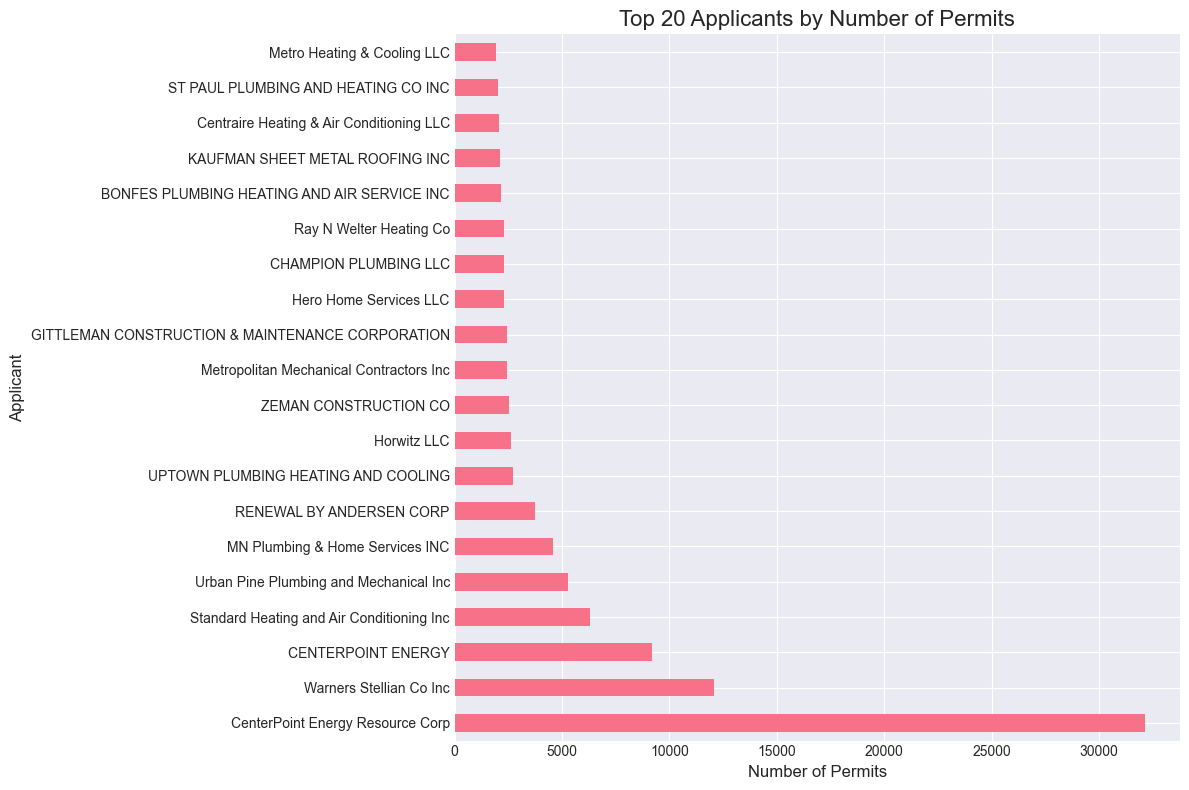

In [24]:
# Top applicants by permit count
top_applicants = df['applicantName'].value_counts().head(20)
print("Top 20 Applicants by Permit Count:")
print(top_applicants)

plt.figure(figsize=(12, 8))
top_applicants.plot(kind='barh')
plt.title('Top 20 Applicants by Number of Permits', fontsize=16)
plt.xlabel('Number of Permits', fontsize=12)
plt.ylabel('Applicant', fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
# Analyze applicant cities
applicant_cities = df['applicantCity'].value_counts().head(15)
print("\nTop 15 Applicant Cities:")
print(applicant_cities)


Top 15 Applicant Cities:
applicantCity
Minneapolis      57584
MINNEAPOLIS      48245
St Paul           9728
Edina             9371
Burnsville        8689
Bloomington       7763
St Louis Park     7181
GOLDEN VALLEY     6918
Plymouth          6710
ROSEVILLE         6530
SAINT PAUL        6460
New Hope          5445
Lindstrom         5296
Maplewood         5201
Eden Prairie      4570
Name: count, dtype: int64


## 9. Advanced Analysis

In [26]:
# Analyze occupancy types
occupancy_types = df['occupancyType'].value_counts()
print("Occupancy Type Distribution:")
print(occupancy_types.head(10))

Occupancy Type Distribution:
occupancyType
SFD          177163
              80167
MFD           52871
Comm          33473
TFD            9275
TH             3262
3to4           1074
Mixed           634
Accessory       350
Res              32
Name: count, dtype: int64


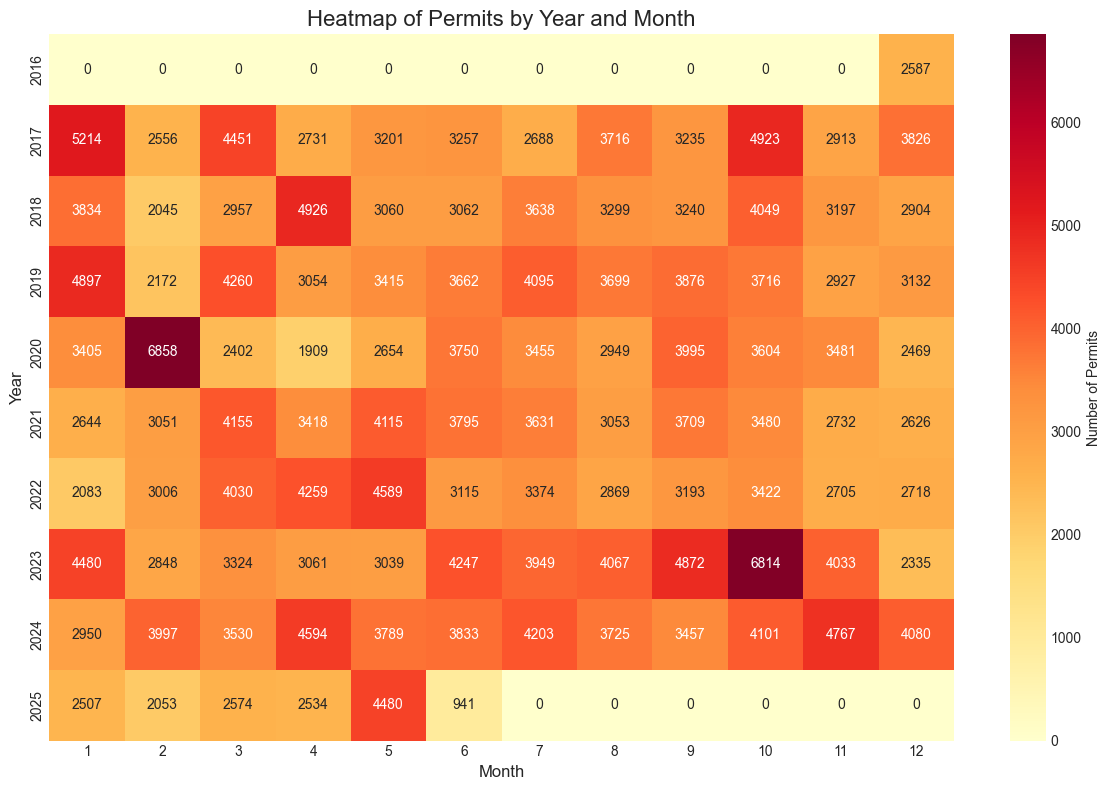

In [27]:
# Create a heatmap of permits by year and month
pivot_data = df.pivot_table(values='permitNumber', index='issue_year', columns='issue_month', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Number of Permits'})
plt.title('Heatmap of Permits by Year and Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# Analyze dwelling units
dwelling_new = df[df['dwellingUnitsNew'] > 0]['dwellingUnitsNew'].sum()
dwelling_eliminated = df[df['dwellingUnitsEliminated'] > 0]['dwellingUnitsEliminated'].sum()

print(f"Total new dwelling units: {dwelling_new}")
print(f"Total eliminated dwelling units: {dwelling_eliminated}")
print(f"Net change in dwelling units: {dwelling_new - dwelling_eliminated}")

Total new dwelling units: 25489.0
Total eliminated dwelling units: 1669.0
Net change in dwelling units: 23820.0


## 10. Summary and Key Insights

In [29]:
# Generate summary report
print("=" * 60)
print("CCS PERMITS ANALYSIS SUMMARY")
print("=" * 60)
print(f"\nTotal number of permits: {len(df):,}")
print(f"Date range: {df['issueDate'].min()} to {df['issueDate'].max()}")
print(f"\nTotal permit value: ${df['value'].sum():,.2f}")
print(f"Total fees collected: ${df['totalFees'].sum():,.2f}")
print(f"\nMost common permit type: {df['permitType'].mode()[0]}")
print(f"Most common work type: {df['workType'].mode()[0]}")
print(f"Most active neighborhood: {df['Neighborhoods_Desc'].mode()[0]}")
print(f"\nAverage permit duration: {df['permit_duration_days'].mean():.1f} days")
print(f"Median permit duration: {df['permit_duration_days'].median():.1f} days")
print(f"\nPermit completion rate: {(df['status'] == 'Closed').sum() / len(df) * 100:.1f}%")
print("\n" + "=" * 60)

CCS PERMITS ANALYSIS SUMMARY

Total number of permits: 358,301
Date range: 2016-12-01 09:09:53+00:00 to 2025-06-09 20:56:48+00:00

Total permit value: $31,427,300,478.98
Total fees collected: $589,038,646.56

Most common permit type: Plumbing
Most common work type: Res
Most active neighborhood: Loring Park

Average permit duration: 317.6 days
Median permit duration: 145.0 days

Permit completion rate: 88.5%



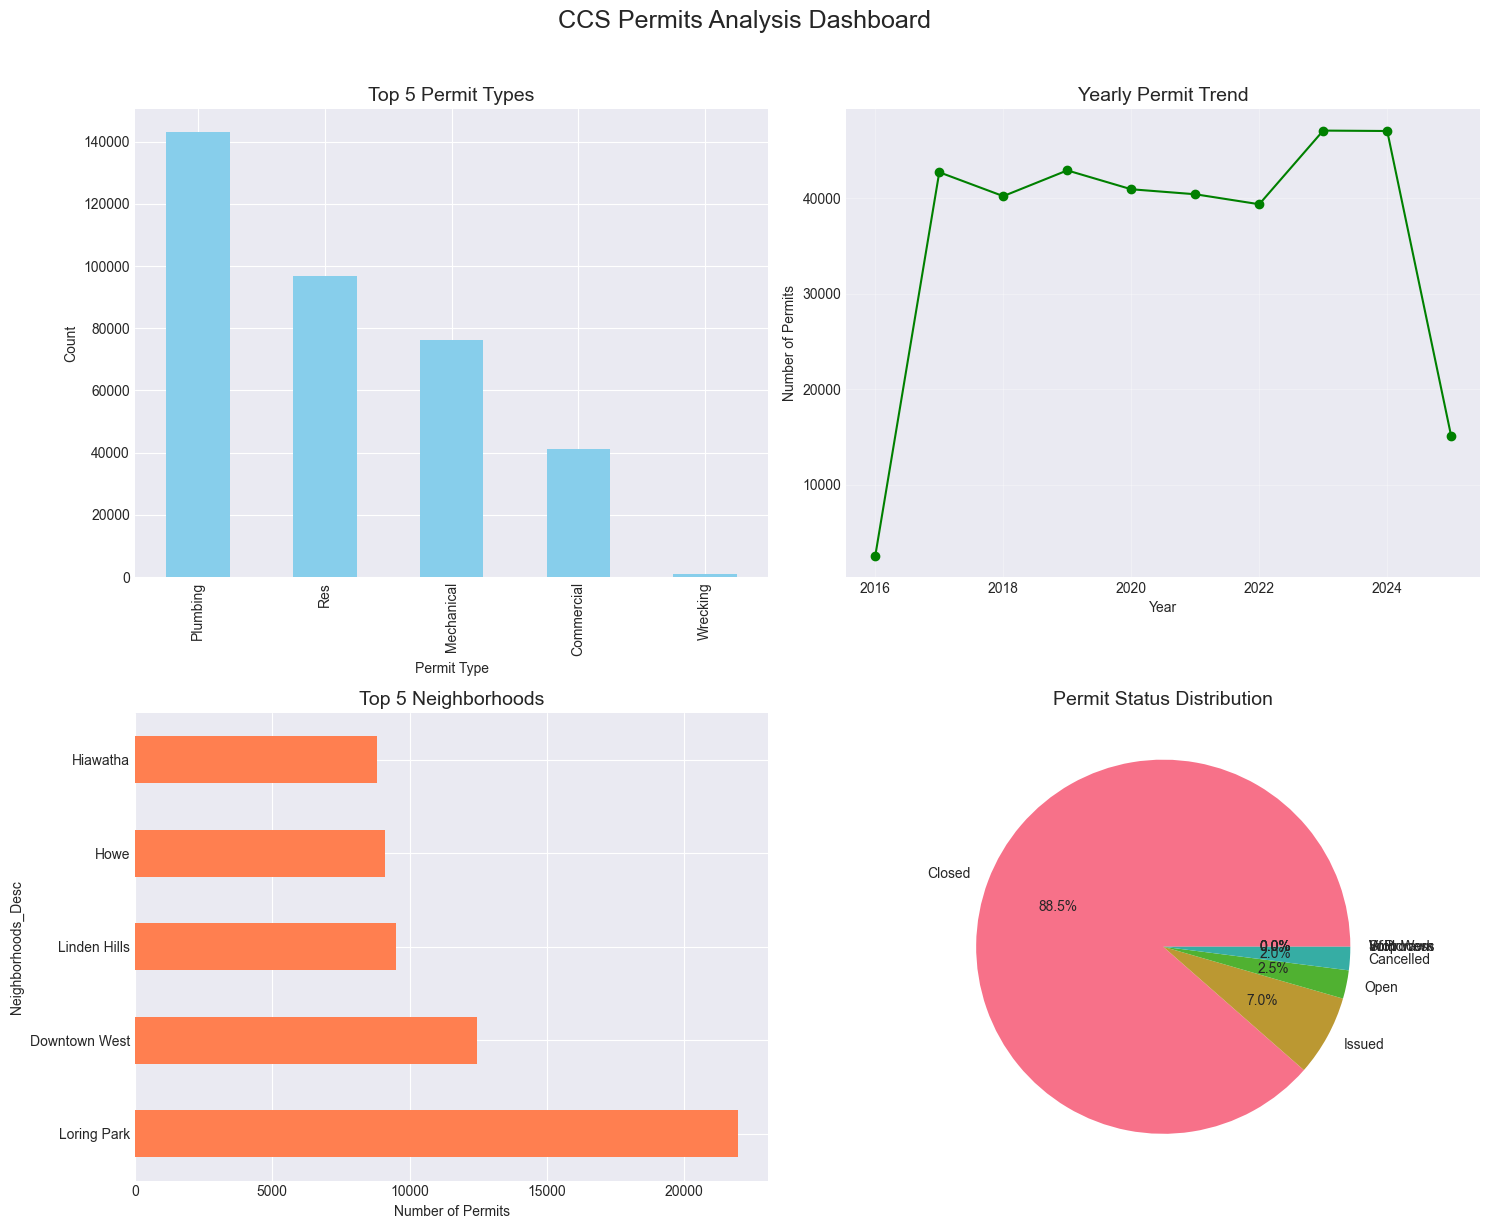

In [30]:
# Create a dashboard-style summary plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Top permit types
permit_types.head(5).plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 5 Permit Types', fontsize=14)
axes[0, 0].set_xlabel('Permit Type')
axes[0, 0].set_ylabel('Count')

# Plot 2: Yearly trend
yearly_permits.plot(kind='line', ax=axes[0, 1], marker='o', color='green')
axes[0, 1].set_title('Yearly Permit Trend', fontsize=14)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Permits')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Top neighborhoods
neighborhoods.head(5).plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Top 5 Neighborhoods', fontsize=14)
axes[1, 0].set_xlabel('Number of Permits')

# Plot 4: Status distribution
status_counts.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Permit Status Distribution', fontsize=14)
axes[1, 1].set_ylabel('')

plt.suptitle('CCS Permits Analysis Dashboard', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## 11. Solar Panel Permits Analysis

In [31]:
# Analyze top solar installers/applicants
solar_applicants = solar_permits['applicantName'].value_counts().head(10)
print("\nTop 10 Solar Installers/Applicants:")
print(solar_applicants)

plt.figure(figsize=(12, 8))
solar_applicants.plot(kind='barh')
plt.title('Top 10 Solar Installers by Number of Permits', fontsize=16)
plt.xlabel('Number of Permits', fontsize=12)
plt.ylabel('Installer/Applicant', fontsize=12)
plt.tight_layout()
plt.show()

NameError: name 'solar_permits' is not defined

In [ ]:
# Extract year from issue date for solar permits
solar_permits['issue_year'] = solar_permits['issueDate'].dt.year

# Analyze solar permits by year
solar_by_year = solar_permits['issue_year'].value_counts().sort_index()
print("\nSolar permits by year:")
print(solar_by_year)

# Visualize the trend
plt.figure(figsize=(12, 6))
solar_by_year.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Solar Panel Permits Issued by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Solar Permits', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Search for solar-related permits
solar_keywords = ['solar', 'Solar', 'SOLAR', 'photovoltaic', 'PV', 'panel']
solar_mask = df['comments'].str.contains('|'.join(solar_keywords), case=False, na=False)
solar_permits = df[solar_mask].copy()

print(f"Total number of solar permits found: {len(solar_permits)}")
print(f"Percentage of total permits: {len(solar_permits)/len(df)*100:.2f}%")
print("\nFirst 5 solar permit comments:")
for i, comment in enumerate(solar_permits['comments'].head()):
    print(f"\n{i+1}. {comment[:150]}...")